In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from datetime import datetime
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from astropy.table import Table
import pandas as pd

np.set_printoptions(precision=4)

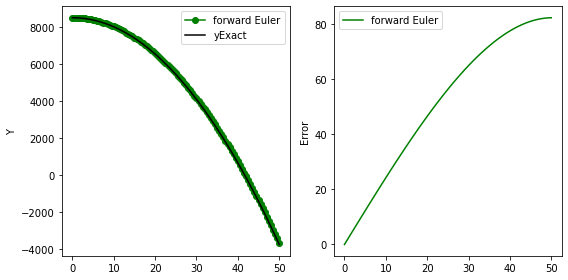

In [2]:
# Example: Falling meteorite, forward Euler method only

# d^2y/dt^2 = -g + (b/m)*dy/dt
# exact solution: y = y0 + g*(m/b)^2 *(1-np.exp(-b*t/m)) - (m*g/b)*t


def f(v,m,g,b):  # d^2/dt^2
    return -g + b*v/m

g = 9.8
m = 100
b = 0.01
y0 = 8.5e3
v0 = 0

dt = 0.5 # Step size
nsteps = 100
t = np.linspace(0,nsteps * dt,nsteps + 1)

y = np.zeros(nsteps+1)
v = np.zeros(nsteps+1)
y[0] = y0
v[0] = v0

# forward Euler
for i in range(nsteps):
    y[i + 1] = y[i] + dt*v[i]
    v[i + 1] = v[i] + dt*f(v[i],m,g,b)

#exact solution
yExact = y0 + g*(m/b)**2 * (1-np.exp(-b*t/m)) - (m*g/b)*t

fig,ax = plt.subplots(1,2,figsize = (8, 4))
ax[0].plot(t, y, 'g-o', label='forward Euler')
ax[0].plot(t, yExact, 'k-', label='yExact')
ax[0].set_ylabel('Y')
ax[0].legend()

ax[1].plot(t, y - yExact, 'g', label='forward Euler')
ax[1].set_ylabel('Error')
ax[1].legend()

fig.tight_layout()

### Problem 1.  
As show in class, the equation of motion for the damped pendulum is:  

$m\ddot{x} + d\dot{x} + kx = 0$   
$\Rightarrow dv/dt = -(d/m)v - (k/m)x$  

Solve the equation, i.e., calculate $x(t)$, using forward Euler and symplectic Euler.  Make 2 plots side by side:  

Left plot: x(t) vs. t, from both Euler methods AND exact solution (3 curves total). Turn grid on.  
Right plot: x(t) - xExact vs. t, for both Euler methods (2 curves).  Turn grid on. 

I have started the code below for you, with the appropriate constants and initial conditions.

In [3]:
def dvdt(d, m, v, k, x):
    return (-d * v / m ) + (-k / m) * x

m = 1.
d = 0.05
k = 0.5
x0 = 10
v0 = 0

dt = 0.05 # Step size
nsteps = 1000
t = np.linspace(0,nsteps * dt,nsteps + 1)

x = np.zeros(nsteps+1)
v = np.zeros(nsteps+1)
x[0] = x0
v[0] = v0

xSymp = np.zeros(nsteps+1)
vSymp = np.zeros(nsteps+1)
xSymp[0] = x0
vSymp[0] = v0

# forward Euler
for i in range(nsteps):
    x[i + 1] = x[i] + dt*v[i]
    v[i + 1] = v[i] + dt*dvdt(d, m, v[i], k, x[i])
    
for i in range(nsteps):
    vSymp[i + 1] = vSymp[i] + dt*dvdt(d, m, vSymp[i], k, xSymp[i])
    xSymp[i + 1] = xSymp[i] + dt*vSymp[i + 1]

#exact solution
xExact = x0 * np.exp(-gamma * t) * (np.cos(omega * t) + (gamma/omega) * np.sin(omega * t))
fig,ax = plt.subplots(1,2,figsize = (8, 4))

ax[0].plot(t, x, 'g-o', label='forward Euler')
ax[0].plot(t, xSymp, 'b-o', label='symp Euler')
ax[0].plot(t, xExact, 'k-', label='yExact')
ax[0].set_ylabel('Y')
ax[0].legend()

ax[1].plot(t, x - xExact, 'g', label='forward Euler')
ax[1].plot(t, xSymp - xExact, 'b', label='symp Euler')
ax[1].set_ylabel('Error')
ax[1].legend()

fig.tight_layout()

NameError: name 'gamma' is not defined

### Problem 2.  

Solve the damped pendulum problem again, this time solution from RK2 midpoint and RK4 (using the code I started in class). Make 2 plots side by side:  

Left plot: $x(t)$ vs. $t$, from forward Euler, symplectic Euler, RK2, RK4, and exact solution (5 curves total).  Turn grid on.  
Right plot: $x(t) - xExact$ vs. $t$, for all 4 numerical methods (4 curves total).  Turn grid on.

Use the same $m, d$, and $k$ constants and initial conditions.

If you wish, you can write a function for each method and make the plots that way.

### Problem 3.  Using scipy
Solve the damped pendulum problem again, this time using scipy's $solve$_$ivp$ and $odeint$. Make 2 plots side by side:  

Left plot: $x(t)$ vs. $t$, from $solve$_$ivp$, $odeint$, and exact solution (3 curves total).  Turn grid on.  
Right plot: $x(t)$ - $xExact$ vs. $t$, for the numerical methods (2 curves total).  Turn grid on.


In [ ]:
xIVP 